In [1]:
from math import *

from MITgcmutils import rdmds

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

%matplotlib inline

from netCDF4 import Dataset


import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import sys

import seaborn as sns

lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

import MetricsPythonTools as mpt




In [16]:
paths = ['/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF']

FluxFiles = ['/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR01Glob.nc',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/FluxTR03Glob.nc',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/FluxTR02Glob.nc',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/FluxTR03Glob.nc',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/FluxTR01Glob.nc',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/FluxTR01Glob.nc',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/FluxTR01Glob.nc',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/FluxTR01Glob.nc',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/FluxTR01Glob.nc',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/FluxTR01Glob.nc',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/FluxTR01Glob.nc',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/FluxTR01Glob.nc',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/FluxTR01Glob.nc']

TrNumList = ['1','3','2','3','1','1','1','1','1','1','1','1','1']
runs = ['run03',
      'run17',
      'run11',
      'run12',
      'run14',
      'run15',
      'run16',
      'run18',
      'run19',
      'run04',
      'run05',
      'run06',
      'run07']

labels = ['Base', 
          'kv=1E-7',
          'kv=1E-4',
          'kv=1E-3',
          'N=3.9E-3',
          'N=6.3E-3',
          'N=3.0E-3',
          'f=7.68E-5',
          'f=4.84E-5',
          'kv_can=1E-7, kv_out=1E-3',
          'kv_can=1E-7, kv_out=1E-4',
          'kv_can=1E-5, kv_out=1E-3',
          'kv_can=1E-5, kv_out=1E-4']

nx = 360
ny = 360
nz = 90
  
Grid1, GridOut1, State1,StateOut1,Ptracers1, PtracersOut1 = mpt.getDatasets(paths[0], runs[0])

rc = GridOut1.variables['RC']
xc = rout.getField(Grid1, 'XC') # x coords tracer cells
yc = rout.getField(Grid1, 'YC') # y coords tracer cells

drF = GridOut1.variables['drF'] # vertical distance between faces
dxG = rout.getField(Grid1,'dxG')
dxF = rout.getField(Grid1,'dxF')
dyF = rout.getField(Grid1,'dyF')
MaskCan = rout.getMask(Grid1,'HFacC')
hFacCCan = rout.getField(Grid1,'HFacC')
rACan = rout.getField(Grid1,'rA')
drFCan=GridOut1.variables['drF']
time = StateOut1.variables['T']
nt = len(time)
nttd = 10
print('Finished reading grid variables')

  

Finished reading grid variables


In [17]:
def calculate_avg_transport(expPath, tr,fname, run, n0, nf):
    
    Grid1, GridOut1, State1,StateOut1,Ptracers1, PtracersOut1 = mpt.getDatasets(expPath, run)
    
    
    #Transect definitions (indices x,y,z,t)
  
    CS = [0,359,227,227,0,29,n0,nf]

    LID = [120,240,227,267,29,29,n0,nf]

    velfile = State1
    
    
    keyw = ('ADVrTr0%s' %tr)
    keyv = ('ADVyTr0%s' %tr)
    keyu = ('ADVxTr0%s' %tr)

    keywd = ('DFrITr0%s' %tr)
    keyvd = ('DFyETr0%s' %tr)
    keyud = ('DFxETr0%s' %tr)

    W,V,U = mpt.get_TRAC(fname, keyw ,keyv, keyu)
    Wd,Vd,Ud = mpt.get_TRAC(fname, keywd ,keyvd, keyud)

    V_CSa = mpt.slice_TRAC(V,CS[0],CS[1],CS[2],CS[3],CS[4],CS[5],CS[6],CS[7])
    V_CSd = mpt.slice_TRAC(Vd,CS[0],CS[1],CS[2],CS[3],CS[4],CS[5],CS[6],CS[7])

    V_CS = np.nansum(np.nanmean(V_CSa+V_CSd,axis=0),axis=0)
    V_CSadv = np.nansum(np.nanmean(V_CSa,axis=0),axis=0)
    V_CSdiff = np.nansum(np.nanmean(V_CSd,axis=0),axis=0)


    W_LIDa = mpt.slice_TRAC(W,LID[0],LID[1],LID[2],LID[3],LID[4],LID[5],LID[6],LID[7])
    W_LIDd = mpt.slice_TRAC(Wd,LID[0],LID[1],LID[2],LID[3],LID[4],LID[5],LID[6],LID[7])

    W_LID = np.nansum(np.nanmean(W_LIDa+W_LIDd,axis=0))
    W_LIDadv = np.nansum(np.nanmean(W_LIDa,axis=0))
    W_LIDdiff = np.nansum(np.nanmean(W_LIDd,axis=0))


    
    return(V_CS,V_CSadv,V_CSdiff,W_LID,W_LIDadv,W_LIDdiff)


0
1
2
3
4
5
6
7
8
9
10
11
12


IndexError: list index out of range

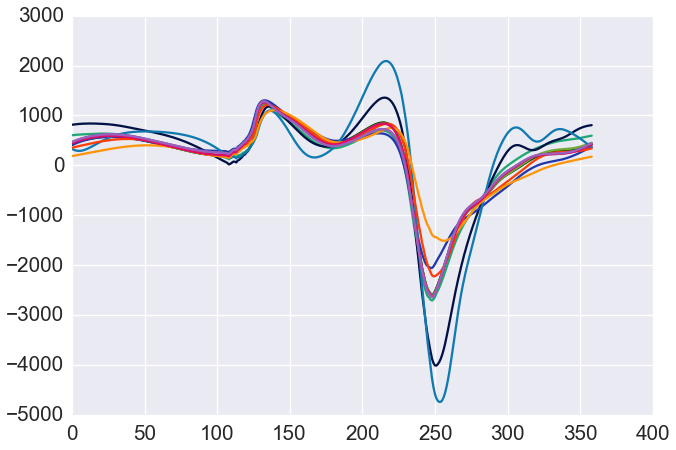

In [18]:

VertTracer = np.empty(len(runs))
CSTracer = np.empty(len(runs))
VertTracerAdv = np.empty(len(runs))
CSTracerAdv = np.empty(len(runs))
VertTracerDiff = np.empty(len(runs))
CSTracerDiff = np.empty(len(runs))

colors_Diff = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
          "red orange","tangerine","purplish","cerise","amethyst","lavender pink"]


color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.6)
fig, ax1 = plt.subplots(1,1)

ii = 0



for path, rr,fileName,numTr in zip(paths,runs,FluxFiles,TrNumList):
    
    CS,CSadv,CSdiff, VertTracer[ii],VertTracerAdv[ii],VertTracerDiff[ii] = calculate_avg_transport(path, numTr,
                                                                                                   fileName, rr, 
                                                                                                   10, nt)
    CSTracer[ii] = np.nansum(CS)
    CSTracerAdv[ii] = np.nansum(CSadv)
    CSTracerDiff[ii] = np.nansum(CSdiff)
    
    print(ii)
    
    ax1.plot(CS, label = labels[ii])
    ii = ii+1
    
plt.show()


In [19]:
fvector = np.array([9.66E-5,9.66E-5,9.66E-5,
                    9.66E-5,9.66E-5,9.66E-5,
                    9.66E-5,7.68E-5,4.84E-5,
                    9.66E-5,9.66E-5,9.66E-5,9.66E-5])

Nvector = np.array([5.5E-3,5.5E-3,5.5E-3,
                    5.5E-3,3.9E-3,6.3E-3,
                    3.0E-3,5.5E-3,5.5E-3,
                    5.5E-3,5.5E-3,5.5E-3,5.5E-3])

Kv = np.array([1E-5,1E-7,1E-4,
               1E-3,1E-5,1E-5,
               1E-5,1E-5,1E-5,
               1E-7,1E-7,1E-5,1E-5,])

Hs = 152.5 # m
W = 8300.0 # m
T = 3600.0 # s timescale for diffusion
L = 6400.0 # m Canyon length
A = L*W # Scale for canyon area i just made up. About size of high concentration region
Z = 10.0 # m scale for depth of blob of HCW
U = 0.18 # m/s shelf current

Pe = (L*Kv)/(U*(Z*Z))

Bu = (Nvector*Hs)/(fvector*W)

Xi = (Kv*Nvector)/((fvector**2)*(L**2)) 


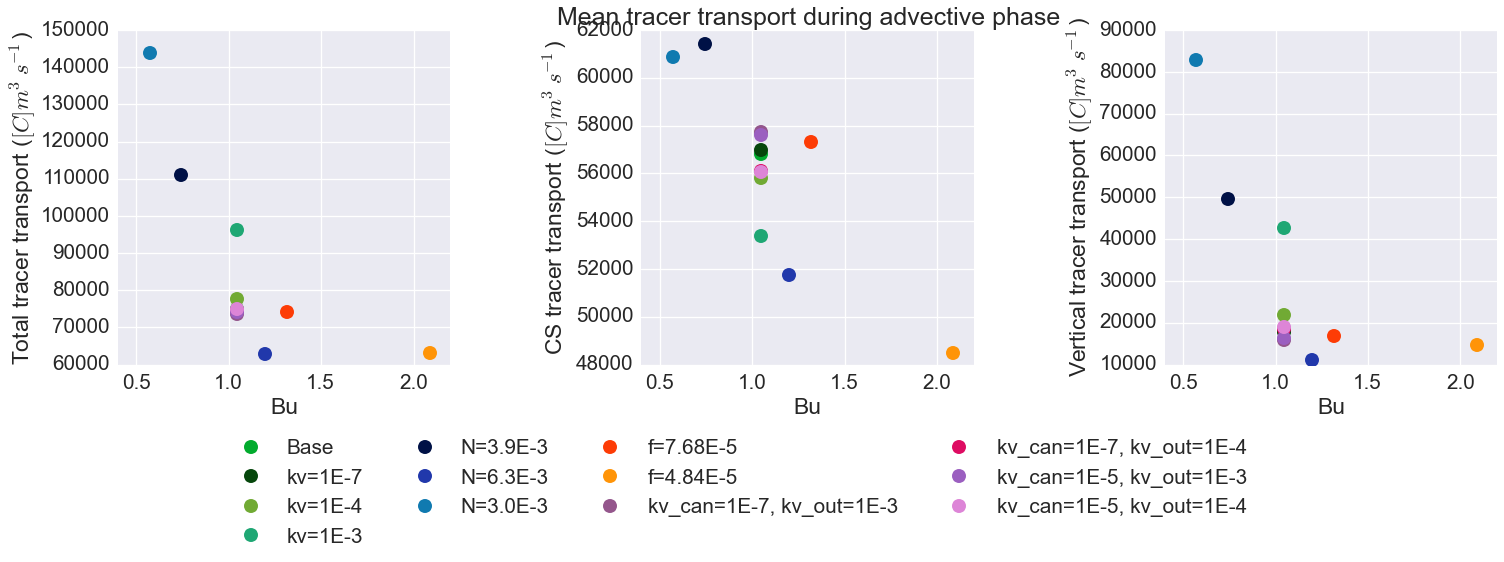

In [20]:
colors_Diff = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
          "red orange","tangerine","purplish","cerise","amethyst","lavender pink"]


color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.6)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(21, 6))



for ii in range(len(runs)):
    ax1.plot(Bu[ii],VertTracer[ii]+CSTracer[ii],'o',markersize=14,label=labels[ii])
    ax2.plot(Bu[ii],CSTracer[ii],'o',markersize=14,label=labels[ii])
    ax3.plot(Bu[ii],VertTracer[ii],'o',markersize=14,label=labels[ii])
    
    


ax1.set_aspect('auto')

ax2.set_title('Mean tracer transport during advective phase')
    
ax1.set_ylabel('Total tracer transport ($[C]m^3s^{-1}$)')
ax2.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax3.set_ylabel('Vertical tracer transport ($[C]m^3s^{-1}$)')
    
ax1.set_xlabel('Bu')
ax2.set_xlabel('Bu')
ax3.set_xlabel('Bu')

ax3.legend(loc ='lower right', bbox_to_anchor=(0.3,-0.6), ncol=4)    

plt.tight_layout()

plt.show()

fig.savefig('/home/kramosmu/Documents/CommitteeMeeting2016/Figures/TotalTracerTransportAdvPhase_vs_Bu.pdf', format='pdf', dpi=1000, bbox_inches='tight')


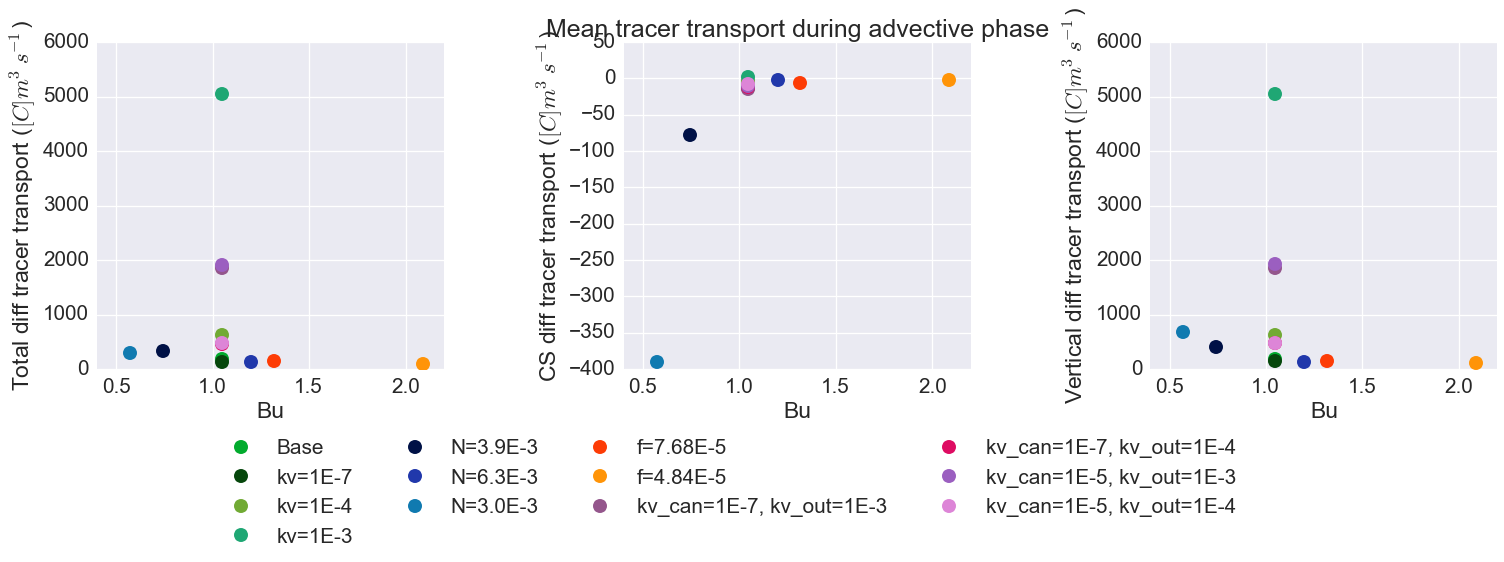

In [21]:
colors_Diff = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
          "red orange","tangerine","purplish","cerise","amethyst","lavender pink"]


color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.6)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(21, 6))



for ii in range(len(runs)):
    ax1.plot(Bu[ii],VertTracerDiff[ii]+CSTracerDiff[ii],'o',markersize=14,label=labels[ii])
    ax2.plot(Bu[ii],CSTracerDiff[ii],'o',markersize=14,label=labels[ii])
    ax3.plot(Bu[ii],VertTracerDiff[ii],'o',markersize=14,label=labels[ii])
    
    


ax1.set_aspect('auto')

ax2.set_title('Mean tracer transport during advective phase')
    
ax1.set_ylabel('Total diff tracer transport ($[C]m^3s^{-1}$)')
ax2.set_ylabel('CS diff tracer transport ($[C]m^3s^{-1}$)')
ax3.set_ylabel('Vertical diff tracer transport ($[C]m^3s^{-1}$)')
    
ax1.set_xlabel('Bu')
ax2.set_xlabel('Bu')
ax3.set_xlabel('Bu')

ax3.legend(loc ='lower right', bbox_to_anchor=(0.3,-0.6), ncol=4)    

plt.tight_layout()

plt.show()

fig.savefig('/home/kramosmu/Documents/CommitteeMeeting2016/Figures/TotalTracerDiffTransportAdvPhase_vs_Bu.pdf', format='pdf', dpi=1000, bbox_inches='tight')


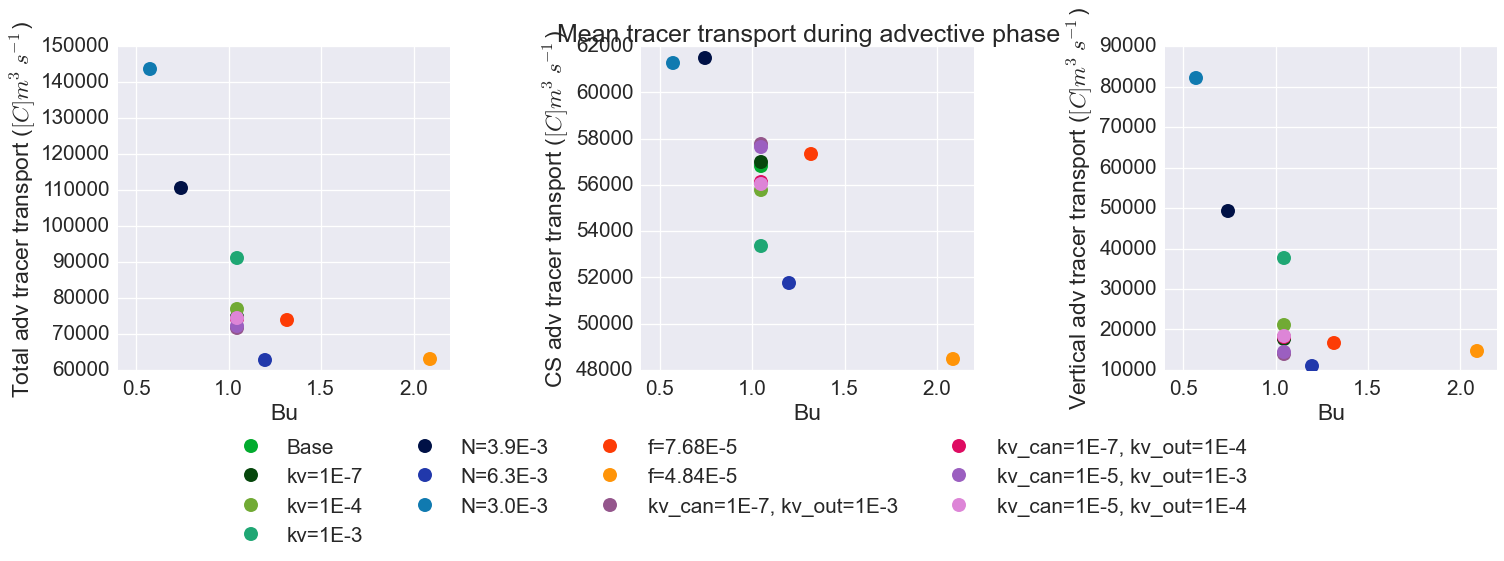

In [22]:
colors_Diff = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
          "red orange","tangerine","purplish","cerise","amethyst","lavender pink"]


color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.6)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(21, 6))



for ii in range(len(runs)):
    ax1.plot(Bu[ii],VertTracerAdv[ii]+CSTracerAdv[ii],'o',markersize=14,label=labels[ii])
    ax2.plot(Bu[ii],CSTracerAdv[ii],'o',markersize=14,label=labels[ii])
    ax3.plot(Bu[ii],VertTracerAdv[ii],'o',markersize=14,label=labels[ii])
    
    


ax1.set_aspect('auto')

ax2.set_title('Mean tracer transport during advective phase')
    
ax1.set_ylabel('Total adv tracer transport ($[C]m^3s^{-1}$)')
ax2.set_ylabel('CS adv tracer transport ($[C]m^3s^{-1}$)')
ax3.set_ylabel('Vertical adv tracer transport ($[C]m^3s^{-1}$)')
    
ax1.set_xlabel('Bu')
ax2.set_xlabel('Bu')
ax3.set_xlabel('Bu')

ax3.legend(loc ='lower right', bbox_to_anchor=(0.3,-0.6), ncol=4)    

plt.tight_layout()

plt.show()

fig.savefig('/home/kramosmu/Documents/CommitteeMeeting2016/Figures/TotalTracerAdvTransportAdvPhase_vs_Bu.pdf', format='pdf', dpi=1000, bbox_inches='tight')


## Time dependent phase

0
1
2
3
4
5
6
7
8
9
10
11
12


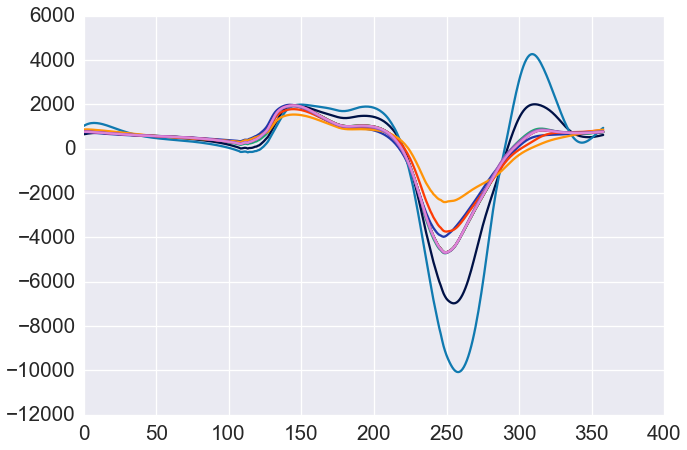

In [25]:
VertTracerTD = np.empty(len(runs))
CSTracerTD = np.empty(len(runs))
VertTracerAdvTD = np.empty(len(runs))
CSTracerAdvTD = np.empty(len(runs))
VertTracerDiffTD = np.empty(len(runs))
CSTracerDiffTD = np.empty(len(runs))

colors_Diff = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
          "red orange","tangerine","purplish","cerise","amethyst","lavender pink"]


color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.6)
fig, ax1 = plt.subplots(1,1)

ii = 0



for path, rr,fileName,numTr in zip(paths,runs,FluxFiles,TrNumList):
    
    CS,CSadv,CSdiff, VertTracerTD[ii],VertTracerAdvTD[ii],VertTracerDiffTD[ii] = calculate_avg_transport(path, numTr,
                                                                                                   fileName, rr, 
                                                                                                   0, 10)
    CSTracerTD[ii] = np.nansum(CS)
    CSTracerAdvTD[ii] = np.nansum(CSadv)
    CSTracerDiffTD[ii] = np.nansum(CSdiff)
    
    print(ii)
    
    ax1.plot(CS, label = labels[ii])
    ii = ii+1
    
plt.show()


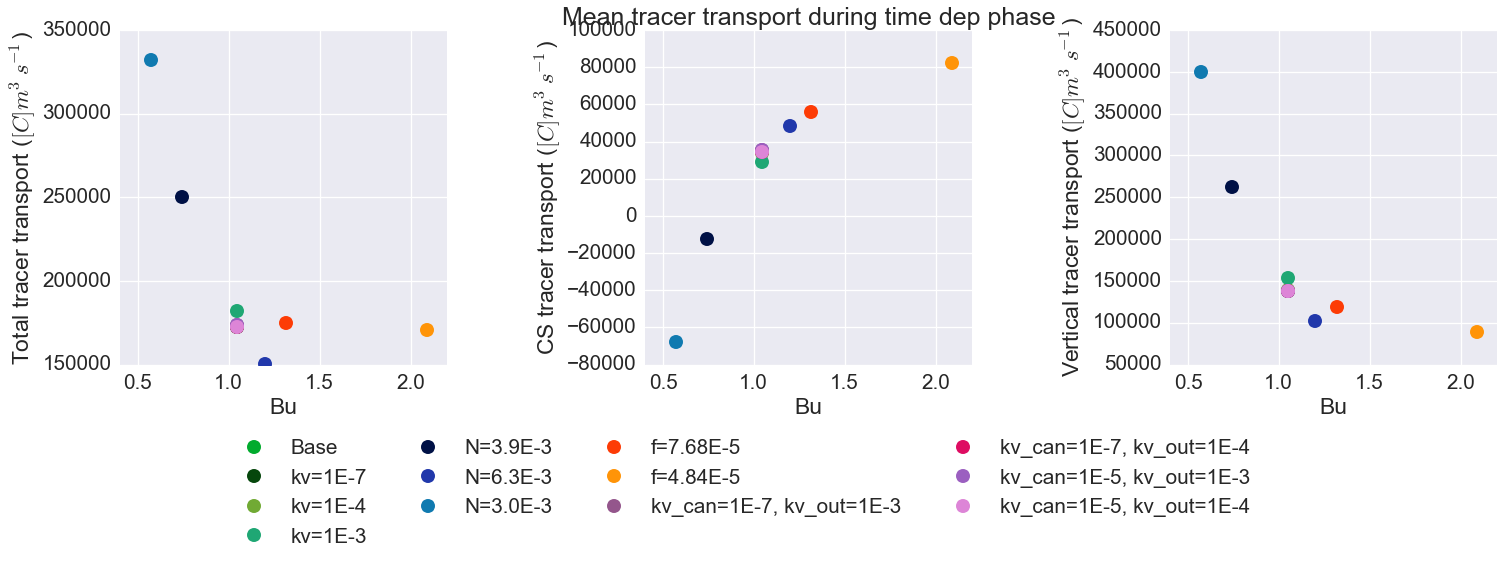

In [26]:
colors_Diff = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
          "red orange","tangerine","purplish","cerise","amethyst","lavender pink"]


color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.6)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(21, 6))



for ii in range(len(runs)):
    ax1.plot(Bu[ii],VertTracerTD[ii]+CSTracerTD[ii],'o',markersize=14,label=labels[ii])
    ax2.plot(Bu[ii],CSTracerTD[ii],'o',markersize=14,label=labels[ii])
    ax3.plot(Bu[ii],VertTracerTD[ii],'o',markersize=14,label=labels[ii])
    
    


ax1.set_aspect('auto')

ax2.set_title('Mean tracer transport during time dep phase')
    
ax1.set_ylabel('Total tracer transport ($[C]m^3s^{-1}$)')
ax2.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax3.set_ylabel('Vertical tracer transport ($[C]m^3s^{-1}$)')
    
ax1.set_xlabel('Bu')
ax2.set_xlabel('Bu')
ax3.set_xlabel('Bu')

ax3.legend(loc ='lower right', bbox_to_anchor=(0.3,-0.6), ncol=4)    

plt.tight_layout()

plt.show()

fig.savefig('/home/kramosmu/Documents/CommitteeMeeting2016/Figures/TotalTracerTransportTimeDepPhase_vs_Bu.pdf', format='pdf', dpi=1000, bbox_inches='tight')


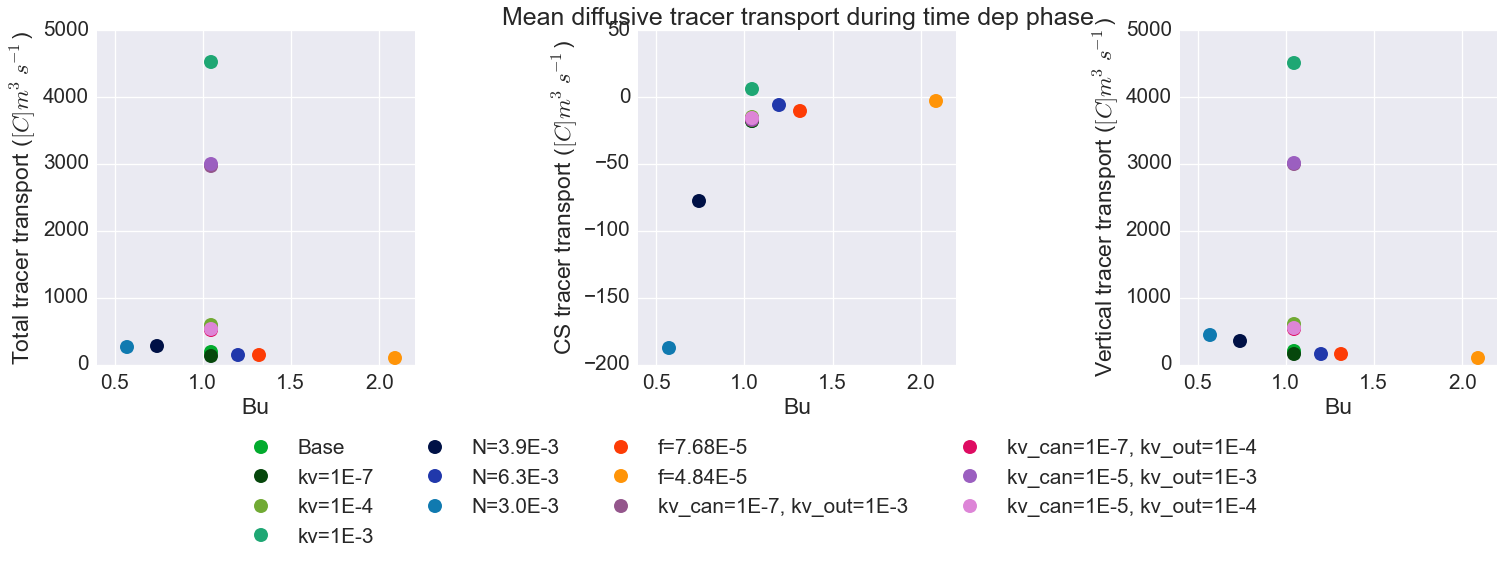

In [27]:
colors_Diff = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
          "red orange","tangerine","purplish","cerise","amethyst","lavender pink"]


color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.6)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(21, 6))



for ii in range(len(runs)):
    ax1.plot(Bu[ii],VertTracerDiffTD[ii]+CSTracerDiffTD[ii],'o',markersize=14,label=labels[ii])
    ax2.plot(Bu[ii],CSTracerDiffTD[ii],'o',markersize=14,label=labels[ii])
    ax3.plot(Bu[ii],VertTracerDiffTD[ii],'o',markersize=14,label=labels[ii])
    
    


ax1.set_aspect('auto')

ax2.set_title('Mean diffusive tracer transport during time dep phase')
    
ax1.set_ylabel('Total tracer transport ($[C]m^3s^{-1}$)')
ax2.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax3.set_ylabel('Vertical tracer transport ($[C]m^3s^{-1}$)')
    
ax1.set_xlabel('Bu')
ax2.set_xlabel('Bu')
ax3.set_xlabel('Bu')

ax3.legend(loc ='lower right', bbox_to_anchor=(0.3,-0.6), ncol=4)    

plt.tight_layout()

plt.show()

fig.savefig('/home/kramosmu/Documents/CommitteeMeeting2016/Figures/TotalDiffTracerTransportTimeDepPhase_vs_Bu.pdf', format='pdf', dpi=1000, bbox_inches='tight')


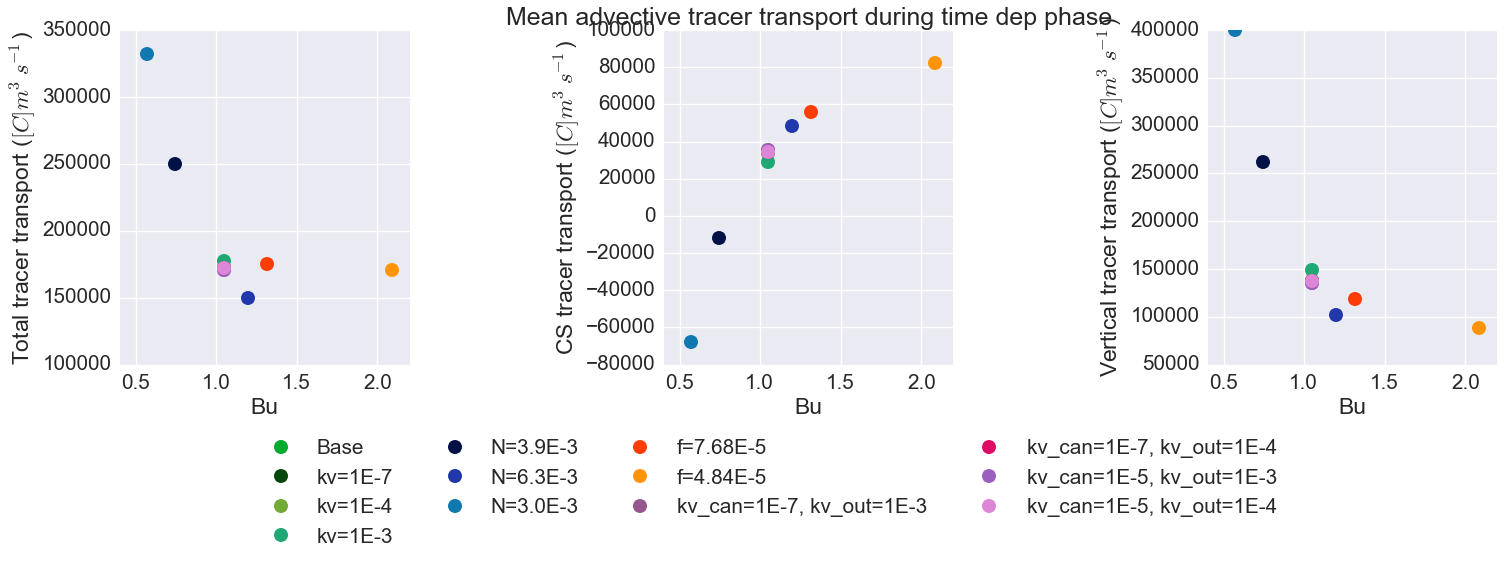

In [28]:
colors_Diff = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
          "red orange","tangerine","purplish","cerise","amethyst","lavender pink"]


color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.6)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(21, 6))



for ii in range(len(runs)):
    ax1.plot(Bu[ii],VertTracerAdvTD[ii]+CSTracerAdvTD[ii],'o',markersize=14,label=labels[ii])
    ax2.plot(Bu[ii],CSTracerAdvTD[ii],'o',markersize=14,label=labels[ii])
    ax3.plot(Bu[ii],VertTracerAdvTD[ii],'o',markersize=14,label=labels[ii])
    
    


ax1.set_aspect('auto')

ax2.set_title('Mean advective tracer transport during time dep phase')
    
ax1.set_ylabel('Total tracer transport ($[C]m^3s^{-1}$)')
ax2.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax3.set_ylabel('Vertical tracer transport ($[C]m^3s^{-1}$)')
    
ax1.set_xlabel('Bu')
ax2.set_xlabel('Bu')
ax3.set_xlabel('Bu')

ax3.legend(loc ='lower right', bbox_to_anchor=(0.3,-0.6), ncol=4)    

plt.tight_layout()

plt.show()

fig.savefig('/home/kramosmu/Documents/CommitteeMeeting2016/Figures/TotalAdvTracerTransportTimeDepPhase_vs_Bu.pdf', format='pdf', dpi=1000, bbox_inches='tight')
